In [1]:
!pip install statsmodels pandas numpy matplotlib tqdm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from tqdm import tqdm

In [4]:
# 예제 데이터 불러오기 (사용자 데이터로 변경 가능)
data = pd.read_csv("index.csv", parse_dates=["Date"], index_col="Date")

# 필요한 변수 선택
cols = ["Banks", "Insurance", "Securities", "KTB3", "KTB10"]
data = data[cols].dropna()

# Rolling window 크기 설정 (예: 5년 단위 = 60개월)
window_size = 365
step_size = 30  # 1개월 단위 이동

# 공적분 관계 개수 저장할 리스트
trace_stat_results = []
p_value_results = []
rolling_dates = []

In [5]:
# Rolling Window 분석 진행
for start in tqdm(range(0, len(data) - window_size, step_size)):
    end = start + window_size
    rolling_dates.append(data.index[end])  # 분석 종료 시점 기록

    # 현재 윈도우의 데이터 추출
    rolling_data = data.iloc[start:end]

    # Johansen Cointegration Test 실행
    test_result = coint_johansen(rolling_data, det_order=1, k_ar_diff=1)

    # Trace Statistic 저장 (r=0, 공적분 관계 없음에 대한 검정 통계량)
    trace_stat = test_result.lr1[0]
    trace_stat_results.append(trace_stat)

    # Trace Test의 p-value 저장 (귀무가설: 공적분 관계 없음)
    p_value = test_result.cvt[0, 1]  # 5% 유의수준 임계값
    p_value_results.append(1 if trace_stat > p_value else 0)  # 기각 여부 (1이면 기각, 즉 공적분 관계 존재)

# 결과를 데이터프레임으로 저장
rolling_results = pd.DataFrame({"Date": rolling_dates, "Trace Stat": trace_stat_results, "Cointegration Exists": p_value_results})
rolling_results.set_index("Date", inplace=True)


100%|███████████████████████████████████████████████████████████████████████████████| 281/281 [00:01<00:00, 263.66it/s]


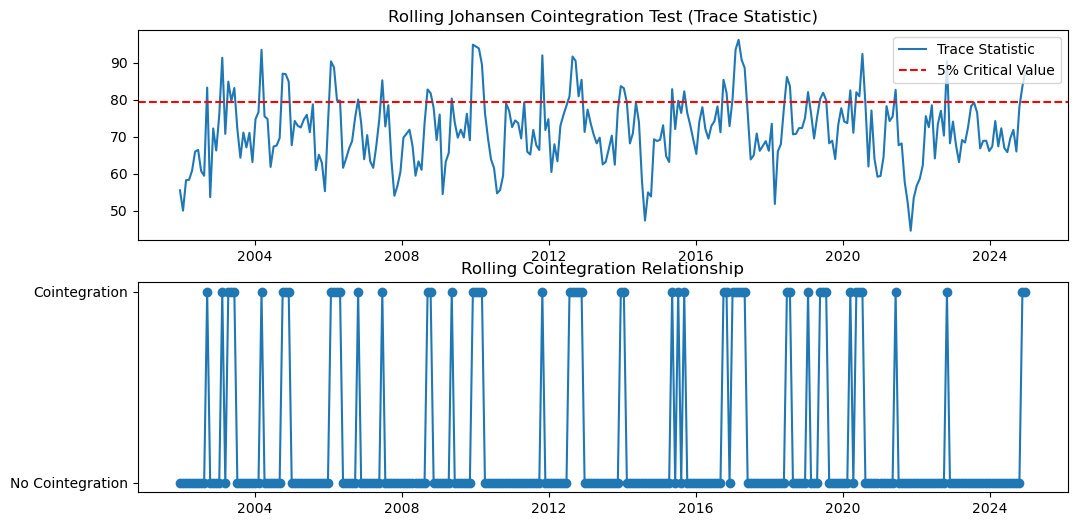

In [6]:
plt.figure(figsize=(12, 6))

# Trace Statistic Plot
plt.subplot(2,1,1)
plt.plot(rolling_results.index, rolling_results["Trace Stat"], label="Trace Statistic")
plt.axhline(y=test_result.cvt[0, 1], color="r", linestyle="--", label="5% Critical Value")
plt.title("Rolling Johansen Cointegration Test (Trace Statistic)")
plt.legend()

# 공적분 관계 여부 Plot
plt.subplot(2,1,2)
plt.plot(rolling_results.index, rolling_results["Cointegration Exists"], marker="o", linestyle="-")
plt.yticks([0, 1], labels=["No Cointegration", "Cointegration"])
plt.title("Rolling Cointegration Relationship")

# 그래프 저장 (PNG 형식)
plt.savefig("plot1.png", dpi=600, bbox_inches="tight")
plt.show()

In [6]:
############################################################

In [7]:
# 예제 데이터 불러오기 (사용자 데이터로 변경 가능)
data = pd.read_csv("index.csv", parse_dates=["Date"], index_col="Date")

# 필요한 변수 선택
cols = ["Banks", "Insurance", "Securities"]
data = data[cols].dropna()

# Rolling window 크기 설정 (예: 5년 단위 = 60개월)
window_size = 730
step_size = 60  # 1개월 단위 이동

# 공적분 관계 개수 저장할 리스트
trace_stat_results = []
p_value_results = []
rolling_dates = []

In [8]:
# Rolling Window 분석 진행
for start in tqdm(range(0, len(data) - window_size, step_size)):
    end = start + window_size
    rolling_dates.append(data.index[end])  # 분석 종료 시점 기록

    # 현재 윈도우의 데이터 추출
    rolling_data = data.iloc[start:end]

    # Johansen Cointegration Test 실행
    test_result = coint_johansen(rolling_data, det_order=1, k_ar_diff=1)

    # Trace Statistic 저장 (r=0, 공적분 관계 없음에 대한 검정 통계량)
    trace_stat = test_result.lr1[0]
    trace_stat_results.append(trace_stat)

    # Trace Test의 p-value 저장 (귀무가설: 공적분 관계 없음)
    p_value = test_result.cvt[0, 1]  # 5% 유의수준 임계값
    p_value_results.append(1 if trace_stat > p_value else 0)  # 기각 여부 (1이면 기각, 즉 공적분 관계 존재)

# 결과를 데이터프레임으로 저장
rolling_results = pd.DataFrame({"Date": rolling_dates, "Trace Stat": trace_stat_results, "Cointegration Exists": p_value_results})
rolling_results.set_index("Date", inplace=True)


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 228.88it/s]


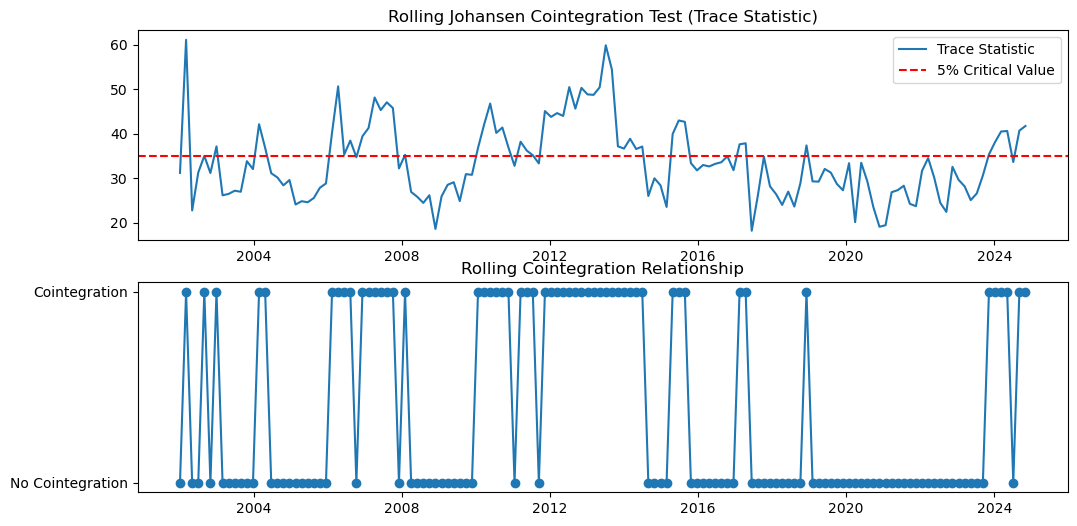

In [9]:
plt.figure(figsize=(12, 6))

# Trace Statistic Plot
plt.subplot(2,1,1)
plt.plot(rolling_results.index, rolling_results["Trace Stat"], label="Trace Statistic")
plt.axhline(y=test_result.cvt[0, 1], color="r", linestyle="--", label="5% Critical Value")
plt.title("Rolling Johansen Cointegration Test (Trace Statistic)")
plt.legend()

# 공적분 관계 여부 Plot
plt.subplot(2,1,2)
plt.plot(rolling_results.index, rolling_results["Cointegration Exists"], marker="o", linestyle="-")
plt.yticks([0, 1], labels=["No Cointegration", "Cointegration"])
plt.title("Rolling Cointegration Relationship")

# 그래프 저장 (PNG 형식)
plt.savefig("plot.png", dpi=600, bbox_inches="tight")
plt.show()

In [32]:
from statsmodels.tsa.vector_ar.var_model import VAR

# 원하는 기간 설정
start_date = '2019-07-07'
end_date = '2024-02-01'
df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

model = VAR(data)
selected_lag = model.select_order(maxlags=50)  # 최대 20시차 고려
print(selected_lag.summary())


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        36.93       36.93   1.092e+16       36.93
1        7.683      7.707*       2171.       7.691
2        7.668       7.712       2138.      7.683*
3        7.665       7.730       2133.       7.687
4        7.664       7.749       2130.       7.693
5        7.661       7.766       2124.       7.697
6        7.663       7.789       2128.       7.706
7        7.663       7.809       2128.       7.713
8        7.662       7.828       2126.       7.718
9       7.660*       7.846      2121.*       7.723
10       7.663       7.869       2128.       7.733
11       7.665       7.892       2133.       7.742
12       7.666       7.913       2134.       7.750
13       7.662       7.929       2125.       7.753
14       7.662       7.950       2126.       7.760
15       7.663       7.971       2128.       7.768
16       7.663       7.992     

In [33]:
from statsmodels.tsa.vector_ar.vecm import CointRankResults

# 원하는 기간 설정
start_date = '2019-07-07'
end_date = '2024-02-01'
df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Johansen 검정 수행
test_result = coint_johansen(data, det_order=1, k_ar_diff=selected_lag.aic)

# 공적분 계수 확인
print(test_result.lr1)  # Trace statistic
print(test_result.cvt)  # Critical values

# 특정 변수만으로 비선형 공적분 검정 (Engle-Granger Test)
from statsmodels.tsa.stattools import coint
coint_test = coint(data["Banks"], data["Securities"])
print("Engle-Granger Test p-value:", coint_test[1])  # p-value 확인


[81.93292357 46.79647881 27.30972212 16.07996746  5.68052453]
[[75.1027 79.3422 87.7748]
 [51.6492 55.2459 62.5202]
 [32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]
Engle-Granger Test p-value: 0.07203643061588494


In [34]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

# 최적 시차 설정 (Lag=9)
lag_order = 9

# 결과 저장할 파일명
output_file = "model_results.txt"

# 파일에 저장하는 함수
def save_output_to_file(output_str, filename):
    with open(filename, "a", encoding="utf-8") as f:  # "a" 모드: 기존 내용 유지하고 추가 저장
        f.write(output_str + "\n\n")

# VAR 모델 설정
var_model = VAR(data)
var_result = var_model.fit(lag_order)
print(var_result.summary())

# VECM 공적분 검정 (Johansen Test)
coint_test = coint_johansen(data, det_order=1, k_ar_diff=lag_order)
print("Trace Statistic:", coint_test.lr1)
print("Critical Values:", coint_test.cvt)

coint_results = f"Trace Statistic:\n{coint_test.lr1}\n\nCritical Values:\n{coint_test.cvt}"
save_output_to_file("=== Johansen Cointegration Test ===\n" + coint_results, output_file)
print("Johansen 공적분 검정 결과가 저장되었습니다.")

# VECM 모델 설정
vecm_model = VECM(data, k_ar_diff=lag_order-1, coint_rank=2)
vecm_result = vecm_model.fit()
print(vecm_result.summary())


# VECM 결과 저장
vecm_summary = vecm_result.summary().as_text()
save_output_to_file("=== VECM Model Results ===\n" + vecm_summary, output_file)
print("VECM 모델 결과가 저장되었습니다.")


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Mar, 2025
Time:                     16:04:30
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    7.86506
Nobs:                     8770.00    HQIC:                   7.74266
Log likelihood:          -95664.7    FPE:                    2163.34
AIC:                      7.67941    Det(Omega_mle):         2107.49
--------------------------------------------------------------------
Results for equation Banks
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 7.743753         4.508924            1.717           0.086
L1.Banks              1.052712         0.014125           74.527           0.000
L1.Insurance         -0.020164         0.012624           -1

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation Banks
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.Banks          0.0529      0.014      3.753      0.000       0.025       0.081
L1.Insurance     -0.0199      0.013     -1.582      0.114      -0.045       0.005
L1.Securities    -0.0152      0.047     -0.322      0.748      -0.108       0.077
L1.KTB3          91.1463     34.182      2.666      0.008      24.150     158.142
L1.KTB10        -79.6204     35.439     -2.247      0.025    -149.079     -10.161
L2.Banks         -0.0552      0.014     -3.914      0.000      -0.083      -0.028
L2.Insurance     -0.0025      0.013     -0.199      0.842      -0.027       0.022
L2.Securities     0.1138      0.047      2.408      0.016       0.021       0.206
L2.KTB3         101.6015     34.267      2.965      0.003      34.440     168.763
L2.KTB10     

In [35]:
print("Trace Statistic:", coint_test.lr1)
print("Critical Values:", coint_test.cvt)

Trace Statistic: [81.93292357 46.79647881 27.30972212 16.07996746  5.68052453]
Critical Values: [[75.1027 79.3422 87.7748]
 [51.6492 55.2459 62.5202]
 [32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# CSV 파일 읽기 (Date 컬럼을 datetime으로 파싱)
df = pd.read_csv("index.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# 2024-02-02 이후 데이터만 선택
filtered_df = df[df.index >= pd.to_datetime("2024-02-02")]

variables = ["Banks", "Insurance", "Securities"]

for var in variables:
    print(f"ADF test for {var} (with constant) on filtered data:")
    result_const = adfuller(filtered_df[var].dropna(), regression='c')
    print("ADF Statistic:", result_const[0])
    print("p-value:", result_const[1])
    print("Critical Values:")
    for key, value in result_const[4].items():
        print(f"    {key}: {value}")
    print("\n")
    
    print(f"ADF test for {var} (with constant and trend) on filtered data:")
    result_ct = adfuller(filtered_df[var].dropna(), regression='ct')
    print("ADF Statistic:", result_ct[0])
    print("p-value:", result_ct[1])
    print("Critical Values:")
    for key, value in result_ct[4].items():
        print(f"    {key}: {value}")
    print("\n")


ADF test for Banks (with constant) on filtered data:
ADF Statistic: -2.173317736219721
p-value: 0.21607168675694216
Critical Values:
    1%: -3.4503224123605194
    5%: -2.870338478726661
    10%: -2.571457612488522


ADF test for Banks (with constant and trend) on filtered data:
ADF Statistic: -3.369029335951992
p-value: 0.05566541795102286
Critical Values:
    1%: -3.986299950657981
    5%: -3.4237973148195917
    10%: -3.1348741726814358


ADF test for Insurance (with constant) on filtered data:
ADF Statistic: -3.2360255780778098
p-value: 0.017991813555020233
Critical Values:
    1%: -3.4502011472639724
    5%: -2.8702852297358983
    10%: -2.5714292194077513


ADF test for Insurance (with constant and trend) on filtered data:
ADF Statistic: -4.13400928297267
p-value: 0.005619411361421567
Critical Values:
    1%: -3.986299950657981
    5%: -3.4237973148195917
    10%: -3.1348741726814358


ADF test for Securities (with constant) on filtered data:
ADF Statistic: -1.597673248594946
p-

In [14]:
# 2024-02-02 이후 데이터만 선택
filtered_data = data[data.index >= pd.to_datetime("2024-02-02")]

# Johansen 공적분 검정을 위한 변수 선택 (예시: 'Insurance', 'Finance', 'Banks')
vars_to_test = filtered_data[['Banks', 'Insurance', 'Securities']]

# Johansen 공적분 검정 수행
# det_order: 0 (상수항 없음) 또는 1 (상수항 포함) 등, k_ar_diff: 차분에 사용할 lag 수 (예: 1)
johansen_result = coint_johansen(vars_to_test, det_order=0, k_ar_diff=1)

# 결과 출력: 고유값, trace statistic, 그리고 임계값(90%, 95%, 99%)
print("Eigenvalues:")
print(johansen_result.eig)
print("\nTrace Statistic:")
print(johansen_result.lr1)
print("\nCritical Values (90%, 95%, 99%):")
print(johansen_result.cvt)

Eigenvalues:
[0.05475129 0.02355665 0.00490227]

Trace Statistic:
[28.15488299  9.51720097  1.626643  ]

Critical Values (90%, 95%, 99%):
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [48]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR

# 1. CSV 파일 읽기 및 전처리
df = pd.read_csv("index.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# 2. 2024-02-02 이후 데이터 선택
filtered_df = df[df.index >= pd.to_datetime("2024-02-02")]

# 3. VAR 분석에 사용할 변수 선택
vars_to_use = ["Banks", "Insurance", "Securities"]
data_vars = filtered_df[vars_to_use]

# 4. 1차 차분 (첫 번째 차분 후 결측치 제거)
diff_data = data_vars.diff().dropna()

# 5. VAR 모형 적합
model = VAR(diff_data)

# Lag order 자동 선택 (최대 10 lags까지 고려)
order_results = model.select_order(maxlags=10)
print("Lag order selection summary:")
print(order_results.summary())

# 여기서는 AIC 기준으로 최적 lag 선택 (예: 'aic' 선택)
#optimal_lag = order_results.selected_orders['aic']
#print(f"\nOptimal lag order (AIC): {optimal_lag}\n")
optimal_lag = 1

model_fit = model.fit(optimal_lag)
print(model_fit.summary())

# 6. 각 변수별 VAR 방정식 출력
# model_fit.params는 각 열이 방정식(종속변수)이고,
# 행은 "const", "L1.Banks", "L1.Insurance", ... 등으로 구성됩니다.
print("\nVAR Equations:")
for var in vars_to_use:
    print(f"\nEquation for {var}:")
    # 각 방정식의 계수 추출 (상수항 및 각 lag의 계수)
    coeffs = model_fit.params[var]
    eq_parts = []
    for param_name, coef in coeffs.items():  # iteritems() 대신 items() 사용
        eq_parts.append(f"({coef:.4f})*{param_name}")
    equation = f"{var}(t) = " + " + ".join(eq_parts)
    print(equation)

Lag order selection summary:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       22.90*      22.93*  8.795e+09*      22.91*
1        22.92       23.06   8.990e+09       22.98
2        22.93       23.18   9.121e+09       23.03
3        22.97       23.32   9.460e+09       23.11
4        23.01       23.47   9.889e+09       23.20
5        23.05       23.61   1.027e+10       23.28
6        23.05       23.72   1.029e+10       23.32
7        23.09       23.87   1.072e+10       23.40
8        23.07       23.95   1.050e+10       23.42
9        23.10       24.09   1.081e+10       23.50
10       23.13       24.22   1.115e+10       23.57
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Mar, 2025
Time:                     20:51:05
-------------------------------

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
"""아래 코드는 원본 데이터를 1차 차분한(diff_data)을 사용하여 VAR 모형을 적합하고, 7일 단위 롤링 예측을 수행한 후 예측된 차분값을 원래 스케일로 복원하는 방식으로 수정한 예시입니다.
즉, 각 예측 윈도우마다 1차 차분 데이터(train_data)를 사용해 VAR 모형을 학습한 후, 해당 윈도우의 마지막 실제 값(원본 데이터)을 기준으로 누적합을 더해 복원합니다."""

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR

# 1. CSV 파일 읽기 및 전처리
df = pd.read_csv("index.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# 2. 2024-02-02 이후 데이터 선택 (예측 대상)
# 여기서는 전체 데이터 중에서 사용할 변수들을 다루므로,
# 예측 기간은 forecast_start부터 forecast_end로 설정합니다.
forecast_start = pd.to_datetime("2024-02-02")
forecast_end   = pd.to_datetime("2024-12-30")

# 3. 분석에 사용할 변수 선택 (Banks, Insurance, Securities)
vars_to_use = ["Banks", "Insurance", "Securities"]
data_vars = df[vars_to_use]

# 4. 1차 차분 수행 (첫 행은 NaN이므로 제거)
diff_data = data_vars.diff().dropna()

In [39]:
# 5. 롤링 예측를 위한 변수 초기화
forecast_horizon = 7  # 7일 ahead forecast
all_abs_errors = []   # 각 예측 구간의 절대 오차
all_sq_errors  = []   # 각 예측 구간의 제곱 오차
preds_all      = []   # 모든 예측값 저장 (원래 스케일)
actuals_all    = []   # 모든 실제값 저장 (원래 스케일)
dates_all      = []   # 예측 기간 날짜 저장

current_start = forecast_start

while current_start + pd.Timedelta(days=forecast_horizon - 1) <= forecast_end:
    n_steps = forecast_horizon
    current_end = current_start + pd.Timedelta(days=n_steps) - pd.Timedelta(days=1)
    
    # 예측 구간이 원본 데이터 범위를 초과하면 종료
    if current_end > df.index[-1]:
        break

    # 학습 데이터: 1차 차분 데이터 중, current_start 이전까지 사용
    train_end = current_start - pd.Timedelta(days=1)
    train_data = diff_data.loc[:train_end]
    
    # 학습 데이터가 충분한지 확인 (예: 최소 15일 이상)
    if len(train_data) < 15:
        current_start += pd.Timedelta(days=n_steps)
        continue

    # VAR 모형 적합: 가능한 최대 lag = min(15, n_obs-1)
    model = VAR(train_data)
    n_obs = len(train_data)
    maxlags_val = min(15, n_obs - 1)
    try:
        order_results = model.select_order(maxlags=maxlags_val)
        optimal_lag = order_results.selected_orders['aic']
    except ValueError as e:
        print(f"Skipping window starting at {current_start.date()} due to order selection error: {e}")
        current_start += pd.Timedelta(days=n_steps)
        continue

    if optimal_lag is None or optimal_lag < 1:
        current_start += pd.Timedelta(days=n_steps)
        continue

    model_fit = model.fit(optimal_lag)
    
    # 7일 ahead forecast (차분 데이터에 대해)
    try:
        forecast_diff = model_fit.forecast(y=train_data.values[-optimal_lag:], steps=n_steps)
    except Exception as e:
        print(f"Forecasting failed for window starting at {current_start.date()}: {e}")
        current_start += pd.Timedelta(days=n_steps)
        continue
    
    # 복원: train_end 시점의 원본 값에 누적 차분 예측을 더함
    try:
        last_actual = data_vars.loc[train_end].values  # shape: (n_variables,)
    except KeyError:
        current_start += pd.Timedelta(days=n_steps)
        continue

    forecast_cumsum = np.cumsum(forecast_diff, axis=0)
    forecast_values = last_actual + forecast_cumsum  # 복원된 예측값 (원래 스케일)
    
    forecast_index = pd.date_range(start=current_start, periods=n_steps, freq='D')
    forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=train_data.columns)
    
    # Insurance 변수 예측값과 실제값 비교
    predicted_insurance = forecast_df["Insurance"].values
    actual_insurance = data_vars.loc[current_start:current_end, "Insurance"].values
    
    # 예측 구간이 7일치가 아니라면 건너뛰기
    if len(actual_insurance) != n_steps or len(predicted_insurance) != n_steps:
        current_start += pd.Timedelta(days=n_steps)
        continue

    abs_errors = np.abs(predicted_insurance - actual_insurance)
    sq_errors  = (predicted_insurance - actual_insurance) ** 2

    all_abs_errors.extend(abs_errors.tolist())
    all_sq_errors.extend(sq_errors.tolist())
    preds_all.extend(predicted_insurance.tolist())
    actuals_all.extend(actual_insurance.tolist())
    dates_all.extend(forecast_index.tolist())
    
    print(f"Forecast from {current_start.date()} to {current_end.date()} completed.")
    
    current_start += pd.Timedelta(days=n_steps)

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-02 to 2024-02-08 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-09 to 2024-02-15 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-16 to 2024-02-22 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-23 to 2024-02-29 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-01 to 2024-03-07 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-08 to 2024-03-14 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-15 to 2024-03-21 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-22 to 2024-03-28 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-29 to 2024-04-04 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-05 to 2024-04-11 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-12 to 2024-04-18 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-19 to 2024-04-25 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-26 to 2024-05-02 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-03 to 2024-05-09 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-10 to 2024-05-16 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-17 to 2024-05-23 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-24 to 2024-05-30 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-31 to 2024-06-06 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-07 to 2024-06-13 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-14 to 2024-06-20 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-21 to 2024-06-27 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-28 to 2024-07-04 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-05 to 2024-07-11 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-12 to 2024-07-18 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-19 to 2024-07-25 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-26 to 2024-08-01 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-02 to 2024-08-08 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-09 to 2024-08-15 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-16 to 2024-08-22 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-23 to 2024-08-29 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-30 to 2024-09-05 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-06 to 2024-09-12 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-13 to 2024-09-19 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-20 to 2024-09-26 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-27 to 2024-10-03 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-04 to 2024-10-10 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-11 to 2024-10-17 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-18 to 2024-10-24 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-25 to 2024-10-31 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-01 to 2024-11-07 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-08 to 2024-11-14 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-15 to 2024-11-21 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-22 to 2024-11-28 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-29 to 2024-12-05 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-12-06 to 2024-12-12 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-12-13 to 2024-12-19 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-12-20 to 2024-12-26 completed.


In [40]:
# 만약 리스트 길이가 다르면 최소 길이로 맞춤
min_length = min(len(dates_all), len(preds_all), len(actuals_all))
dates_all = dates_all[:min_length]
preds_all = preds_all[:min_length]
actuals_all = actuals_all[:min_length]


In [41]:
# 전체 예측 오차 지표 계산
all_abs_errors = np.array(all_abs_errors)
p50 = np.median(all_abs_errors)
p90 = np.percentile(all_abs_errors, 90)
mse = np.mean(np.array(all_sq_errors))
mae = np.mean(all_abs_errors)

print("\n----- 전체 예측 오차 지표 -----")
print(f"p50 error (중위 절대 오차): {p50:.4f}")
print(f"p90 error: {p90:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


----- 전체 예측 오차 지표 -----
p50 error (중위 절대 오차): 143.2089
p90 error: 457.3499
MSE: 64783.4054
MAE: 190.9926


In [42]:
# 예측 결과 DataFrame 구성
results_df = pd.DataFrame({
    "Date": dates_all,
    "Predicted_Insurance": preds_all,
    "Actual_Insurance": actuals_all
})
results_df.sort_values("Date", inplace=True)

print("\n예측된 Insurance 값 (상위 5개):")
print(results_df.head())

# CSV 파일로 저장
results_df.to_csv("var_forecast_insurance_1st.csv", index=False)
print("\n예측 결과가 'var_forecast_insurance_1st.csv' 파일로 저장되었습니다.")


예측된 Insurance 값 (상위 5개):
        Date  Predicted_Insurance  Actual_Insurance
0 2024-02-02          7139.228661           7413.61
1 2024-02-03          7123.968733           7413.61
2 2024-02-04          7111.208576           7413.61
3 2024-02-05          7091.393856           7395.10
4 2024-02-06          7078.767422           7304.45

예측 결과가 'var_forecast_insurance_1st.csv' 파일로 저장되었습니다.


In [43]:
# 전체 예측 오차 지표 계산
all_abs_errors = np.array(all_abs_errors)
p50 = np.median(all_abs_errors)
p90 = np.percentile(all_abs_errors, 90)
mse = np.mean(np.array(all_sq_errors))
mae = np.mean(all_abs_errors)

print("\n----- 전체 예측 오차 지표 -----")
print(f"p50 error (중위 절대 오차): {p50:.4f}")
print(f"p90 error: {p90:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


----- 전체 예측 오차 지표 -----
p50 error (중위 절대 오차): 143.2089
p90 error: 457.3499
MSE: 64783.4054
MAE: 190.9926


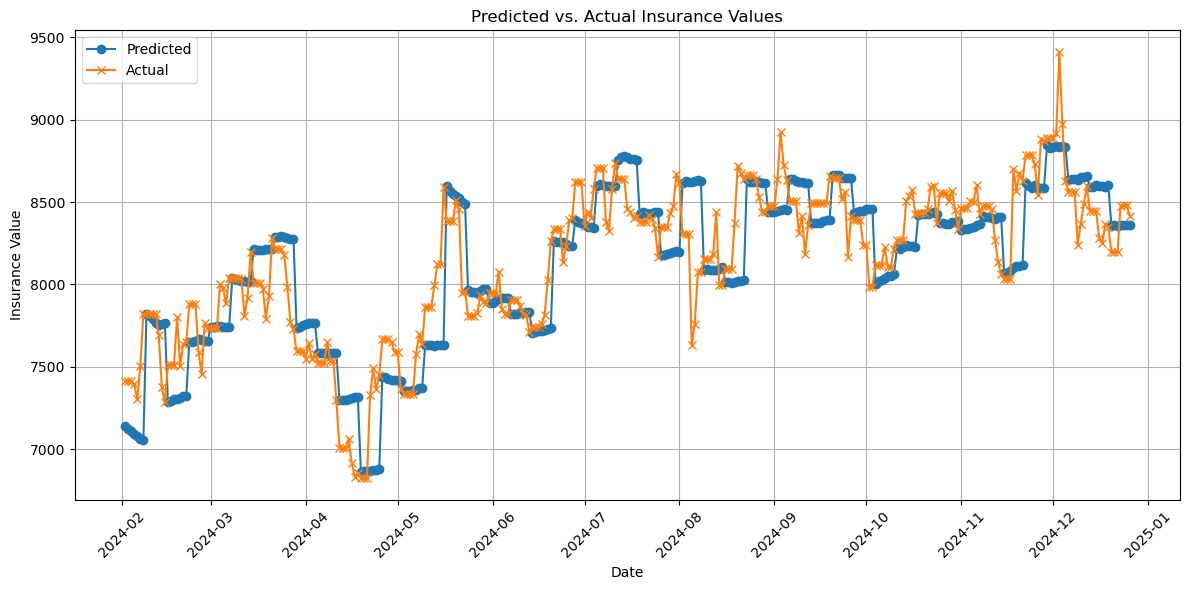

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기 (Date 컬럼을 datetime으로 파싱)
df = pd.read_csv("var_forecast_insurance_1st.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Predicted_Insurance"], label="Predicted", marker="o")
plt.plot(df["Date"], df["Actual_Insurance"], label="Actual", marker="x")
plt.xlabel("Date")
plt.ylabel("Insurance Value")
plt.title("Predicted vs. Actual Insurance Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 저장
plt.savefig("predicted_vs_actual_insurance_1st.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
"""이하는 structural break test code"""

'이하는 structural break test code'

In [3]:
!pip install ruptures


   ---------------------------------------- 0.0/474.0 kB ? eta -:--:--
    --------------------------------------- 10.2/474.0 kB ? eta -:--:--
   ---------------------- ----------------- 266.2/474.0 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 474.0/474.0 kB 4.3 MB/s eta 0:00:00


In [5]:
!pip install arch


   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/926.2 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/926.2 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------  921.6/926.2 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 926.2/926.2 kB 6.5 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from ruptures import Binseg
from arch.unitroot import ZivotAndrews
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [12]:
# 📌 데이터 로드
file_path = "index.csv"
df = pd.read_csv(file_path)

In [13]:
# 📌 날짜 변환 및 정렬
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

In [14]:

# 📌 분석할 종속변수 설정 (예: Finance 지수)
target_var = ['Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10']  # 변수명을 데이터셋에 맞게 조정하세요

In [16]:
# 📌 Chow Test 수동 구현 (단일 시점 구조적 변동 검정)
def chow_test(data, target_col, t_break):
    """
    특정 시점에서 Chow Test를 수행하여 구조적 변동 여부를 검정
    """
    y = data[target_col].values
    X = np.arange(len(data)).reshape(-1, 1)
    X = sm.add_constant(X)  # 절편 추가

    # 전체 데이터 회귀
    model_full = sm.OLS(y, X).fit()

    # 시점을 기준으로 데이터를 나눔
    X1, y1 = X[:t_break], y[:t_break]
    X2, y2 = X[t_break:], y[t_break:]

    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()

    # SSE 계산
    sse_full = np.sum(model_full.resid ** 2)
    sse1 = np.sum(model1.resid ** 2)
    sse2 = np.sum(model2.resid ** 2)

    # Chow Test 통계량 계산
    k = X.shape[1]  # 회귀 계수 개수
    num = (sse_full - (sse1 + sse2)) / k
    denom = (sse1 + sse2) / (len(y) - 2 * k)
    chow_stat = num / denom

    return chow_stat

In [17]:
print(df.columns)


Index(['Date', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10'], dtype='object')


In [18]:
# 📌 특정 시점에서 구조적 변동 검정 (예: 중앙값 시점)
t_break = len(df) // 2  # 데이터 중간을 기준으로 설정
chow_stat = chow_test(df, target_var, t_break)
print(f"Chow Test Statistic: {chow_stat}")

Chow Test Statistic: 3167.837447964942


In [19]:
# 📌 코로나19로 인한 코스피 하락 시작 시점 설정
break_date = pd.Timestamp('2020-02-19')
t_break = df.index[df['Date'] == break_date].tolist()

if t_break:
    t_break = t_break[0]
    chow_stat = chow_test(df, target_var, t_break)
    print(f"Chow Test Statistic at {break_date.date()}: {chow_stat}")
else:
    print(f"Date {break_date.date()} not found in the dataset.")

Chow Test Statistic at 2020-02-19: 2307.7896834877215


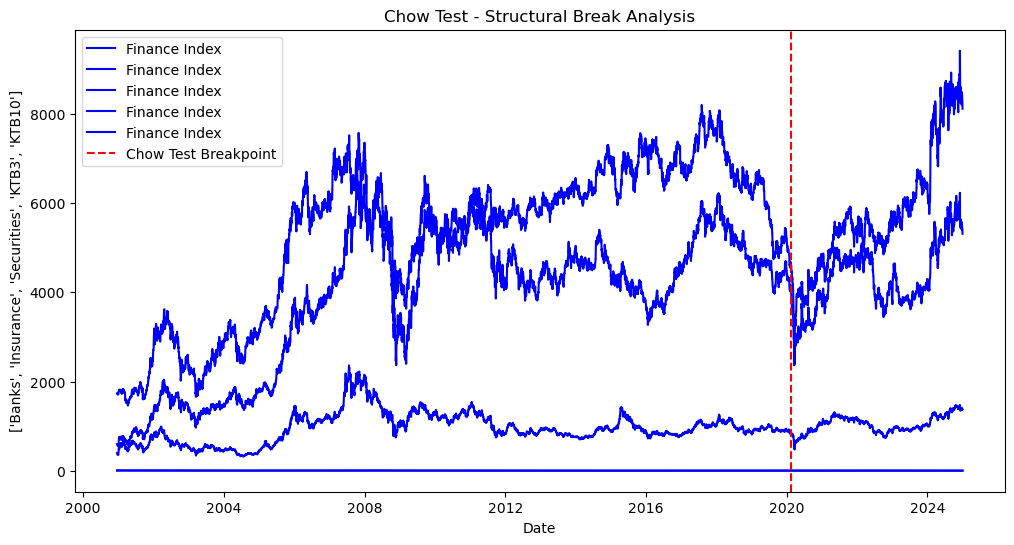

In [20]:
# 📌 Chow Test 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df[target_var], label="Finance Index", color='blue')
if t_break:
    plt.axvline(df['Date'].iloc[t_break], color='red', linestyle='--', label="Chow Test Breakpoint")
plt.xlabel("Date")
plt.ylabel(target_var)
plt.title("Chow Test - Structural Break Analysis")
plt.legend()
plt.show()

In [23]:
# 📌 Bai-Perron Test 적용 (다중 구조적 변동 검정)
algo = Binseg(model="l2").fit(df[target_var].values)
breakpoints = algo.predict(n_bkps=5)  # 최대 3개의 구조적 변동 탐색

print(f"Bai-Perron Detected Breakpoints: {breakpoints}")

Bai-Perron Detected Breakpoints: [1790, 2490, 4545, 6775, 8445, 8779]


In [24]:
# 📌 모든 변수에 대해 Zivot-Andrews Test 수행
for col in target_var:
    print(f"\n📌 Zivot-Andrews Test for {col}")
    za_test = ZivotAndrews(df[col])
    print(za_test.summary())



📌 Zivot-Andrews Test for Banks
        Zivot-Andrews Results        
Test Statistic                 -4.010
P-value                         0.346
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

📌 Zivot-Andrews Test for Insurance
        Zivot-Andrews Results        
Test Statistic                 -4.336
P-value                         0.176
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

📌 Zivot-Andrews Test for Securities
        Zivot-Andrews Results        
Test Statistic                 -3.930
P

In [25]:
# 📌 1차 차분 수행 (단위근 검정 전 변동성 확인)
df_diff = df[target_var].diff().dropna()

# 📌 특정 변수만 선택하여 Zivot-Andrews Test 수행
selected_var = df_diff.var().idxmax()  # 변동성이 가장 큰 변수 선택
print(f"✅ 변동성이 가장 큰 변수: {selected_var}")

# Zivot-Andrews Test 수행
za_test = ZivotAndrews(df[selected_var].dropna())  # 결측값 제거
print(za_test.summary())


✅ 변동성이 가장 큰 변수: Insurance
        Zivot-Andrews Results        
Test Statistic                 -4.336
P-value                         0.176
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [26]:
# 📌 Perron Test (외생적 구조적 변동 시점 설정)
df_pre = df.iloc[:t_break]
df_post = df.iloc[t_break:]

In [27]:
# 📌 모든 변수에 대해 ADF Test 수행
for col in target_var:
    adf_pre = adfuller(df_pre[col].dropna())
    adf_post = adfuller(df_post[col].dropna())

    print(f"\n📌 ADF Test for {col}")
    print(f"Pre-Break ADF Test p-value: {adf_pre[1]}")
    print(f"Post-Break ADF Test p-value: {adf_post[1]}")



📌 ADF Test for Banks
Pre-Break ADF Test p-value: 0.11422328087221956
Post-Break ADF Test p-value: 0.4844140176096845

📌 ADF Test for Insurance
Pre-Break ADF Test p-value: 0.28848352108858044
Post-Break ADF Test p-value: 0.7500342625382534

📌 ADF Test for Securities
Pre-Break ADF Test p-value: 0.09925527605385803
Post-Break ADF Test p-value: 0.6462527037659045

📌 ADF Test for KTB3
Pre-Break ADF Test p-value: 0.6248917537410408
Post-Break ADF Test p-value: 0.627223835630765

📌 ADF Test for KTB10
Pre-Break ADF Test p-value: 0.6719257024704821
Post-Break ADF Test p-value: 0.5385374035686583


In [28]:
# 📌 1차 차분 수행 (변동성 확인)
df_diff = df_pre[target_var].diff().dropna()

# 📌 변동성이 가장 큰 변수 선택
selected_var = df_diff.var().idxmax()
print(f"✅ 변동성이 가장 큰 변수: {selected_var}")

# ADF 단위근 검정 수행
adf_pre = adfuller(df_pre[selected_var].dropna())
adf_post = adfuller(df_post[selected_var].dropna())

print(f"\n📌 ADF Test for {selected_var}")
print(f"Pre-Break ADF Test p-value: {adf_pre[1]}")
print(f"Post-Break ADF Test p-value: {adf_post[1]}")


✅ 변동성이 가장 큰 변수: Banks

📌 ADF Test for Banks
Pre-Break ADF Test p-value: 0.11422328087221956
Post-Break ADF Test p-value: 0.4844140176096845


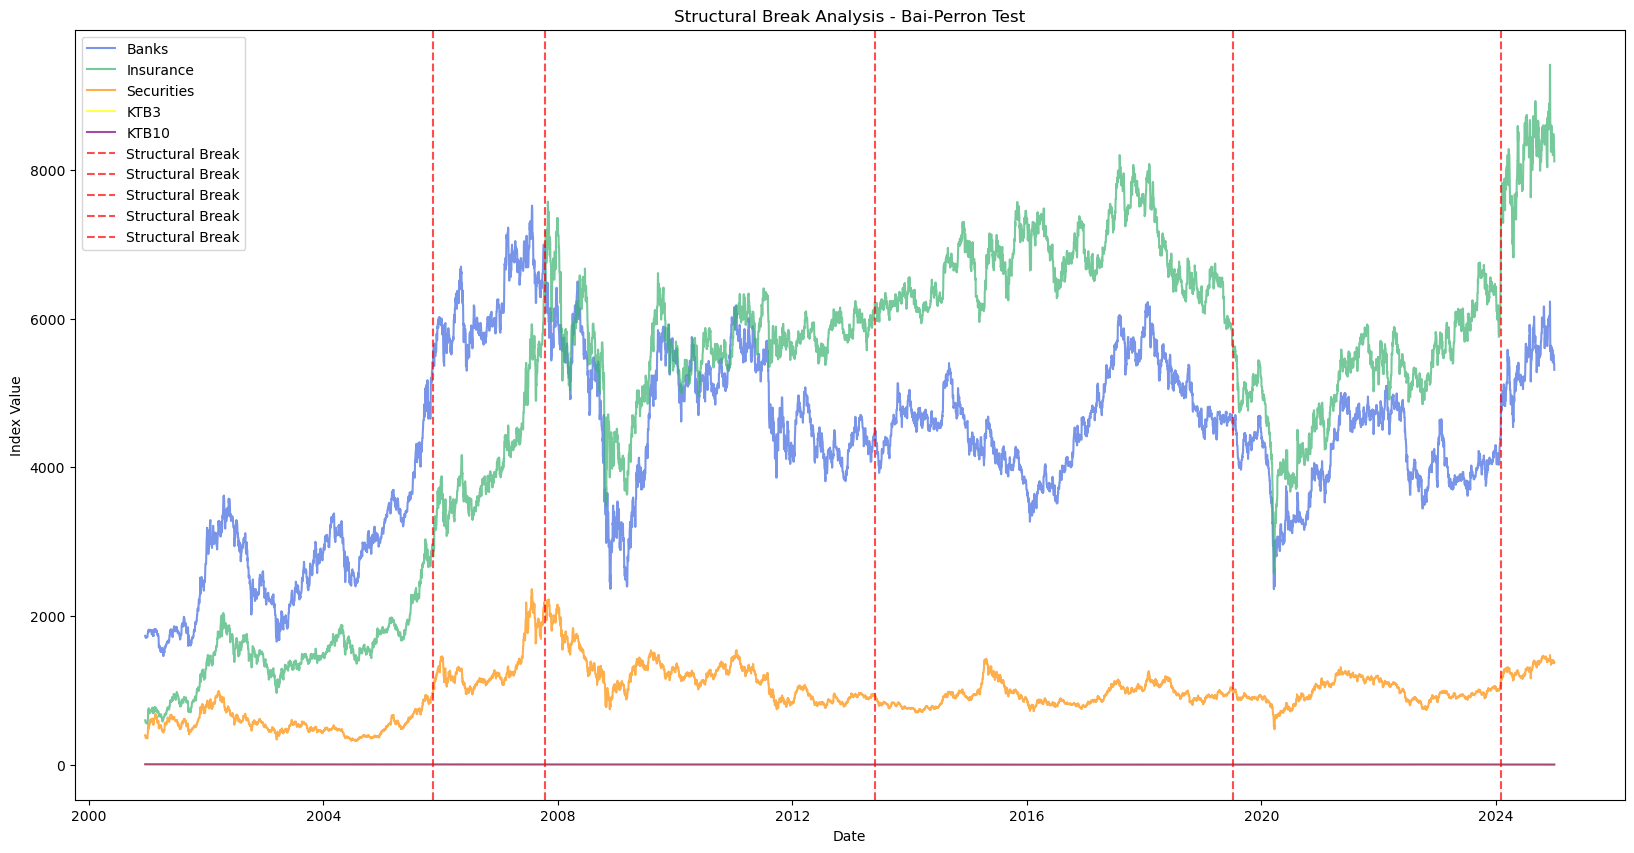

In [30]:
import matplotlib.pyplot as plt

# 📌 연한 색상 설정 (alpha 값 조절)
colors = ['royalblue', 'mediumseagreen', 'darkorange', 'yellow', 'purple']  # 기본 색상
alpha_value = 0.7  # 투명도 설정 (0.0 ~ 1.0, 값이 낮을수록 연한 색)

plt.figure(figsize=(20, 10))

# 📌 각 금융 지수를 개별적으로 플롯 (연한 색 적용)
for i, col in enumerate(target_var):
    plt.plot(df['Date'], df[col], label=col, color=colors[i], alpha=alpha_value)

# 📌 구조적 변동 지점 표시 (붉은색 점선)
for bp in breakpoints[:-1]:  # 마지막 지점 제외
    plt.axvline(df['Date'].iloc[bp], color='red', linestyle='--', alpha=0.7, label="Structural Break")

plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Structural Break Analysis - Bai-Perron Test")
plt.legend()

# 📌 그래프 저장 (파일명: structural_break_analysis.png)
plt.savefig("structural_break_analysis_tlqkf.png", dpi=600, bbox_inches='tight')

# 📌 그래프 출력
plt.show()

In [31]:
# 📌 선택된 구조적 변동 지점(날짜) 확인
structural_break_dates = df['Date'].iloc[breakpoints[:-1]]  # 마지막 값 제외
print("📌 Structural Breaks Detected at:")
print(structural_break_dates.to_list())  # 리스트 형태로 출력


📌 Structural Breaks Detected at:
[Timestamp('2005-11-12 00:00:00'), Timestamp('2007-10-13 00:00:00'), Timestamp('2013-05-29 00:00:00'), Timestamp('2019-07-07 00:00:00'), Timestamp('2024-02-01 00:00:00')]
